<a href="https://colab.research.google.com/github/PrathamK-193/data_cleaning_using_pandas_matplotlib/blob/main/police_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('police.csv')

In [3]:
df.drop_duplicates(inplace=True)
df

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.drop(columns='county_name', inplace=True)
df.drop(columns='search_type', inplace=True)
df.drop(columns='driver_age_raw', inplace=True)
df.drop(columns='violation_raw', inplace=True)

In [5]:
df['stop_datetime']=df['stop_date']+' '+df['stop_time']
df.drop(columns='stop_date',inplace=True)
df.drop(columns='stop_time',inplace=True)

In [6]:
df['driver_gender']=df['driver_gender'].replace('F','Female')
df['driver_gender']=df['driver_gender'].replace('M','Male')

In [7]:
df['driver_age']=df['driver_age'].replace('UNKNOWN',np.nan)
df['driver_age']=df['driver_age'].fillna(0)
df['driver_age']=df['driver_age'].astype(int)
df

,driver_gender,driver_age,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
0,Male,20,White,Speeding,False,Citation,False,0-15 Min,False,2005-01-02 01:55
1,Male,40,White,Speeding,False,Citation,False,0-15 Min,False,2005-01-18 08:15
2,Male,33,White,Speeding,False,Citation,False,0-15 Min,False,2005-01-23 23:15
3,Male,19,White,Other,False,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15
4,Female,21,White,Speeding,False,Citation,False,0-15 Min,False,2005-03-14 10:00
...,...,...,...,...,...,...,...,...,...,...
91736,Male,29,White,Speeding,False,Warning,False,0-15 Min,False,2015-12-31 20:27
91737,Female,33,White,Equipment,False,Warning,False,0-15 Min,False,2015-12-31 20:35
91738,Male,23,White,Moving violation,False,Warning,False,0-15 Min,False,2015-12-31 20:45
91739,Male,22,White,Speeding,False,Citation,False,0-15 Min,False,2015-12-31 21:42


In [8]:
df['driver_race']=df['driver_race'].replace('Other','Unknown')
df['driver_race']=df['driver_race'].replace('Other','Unknown')

In [9]:
df['driver_age']=df['driver_age'].replace(0,np.nan)

In [10]:
df['violation']=df['violation'].replace('Other','Unknown')

In [11]:
df.isna().sum()

,0
driver_gender,5125
driver_age,5410
driver_race,5123
violation,5123
search_conducted,0
stop_outcome,5123
is_arrested,5123
stop_duration,5123
drugs_related_stop,0
stop_datetime,0


In [12]:
missing_values=['driver_gender', 'driver_age', 'driver_race', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'stop_datetime']
df.dropna(subset=missing_values,inplace=True)

In [13]:
df.isna().sum()

,0
driver_gender,0
driver_age,0
driver_race,0
violation,0
search_conducted,0
stop_outcome,0
is_arrested,0
stop_duration,0
drugs_related_stop,0
stop_datetime,0


In [14]:
df

,driver_gender,driver_age,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
0,Male,20.0,White,Speeding,False,Citation,False,0-15 Min,False,2005-01-02 01:55
1,Male,40.0,White,Speeding,False,Citation,False,0-15 Min,False,2005-01-18 08:15
2,Male,33.0,White,Speeding,False,Citation,False,0-15 Min,False,2005-01-23 23:15
3,Male,19.0,White,Unknown,False,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15
4,Female,21.0,White,Speeding,False,Citation,False,0-15 Min,False,2005-03-14 10:00
...,...,...,...,...,...,...,...,...,...,...
91736,Male,29.0,White,Speeding,False,Warning,False,0-15 Min,False,2015-12-31 20:27
91737,Female,33.0,White,Equipment,False,Warning,False,0-15 Min,False,2015-12-31 20:35
91738,Male,23.0,White,Moving violation,False,Warning,False,0-15 Min,False,2015-12-31 20:45
91739,Male,22.0,White,Speeding,False,Citation,False,0-15 Min,False,2015-12-31 21:42


In [15]:
print(df.isna().sum().sum())

0


In [16]:
print((df == 'unknown').sum().sum())

0


In [17]:
df.to_csv("cleaned_police_data.csv", index=False)

In [18]:
from google.colab import files
files.download('cleaned_police_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

/tmp/ipython-input-24-2626851371.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='driver_gender', palette='Set2')


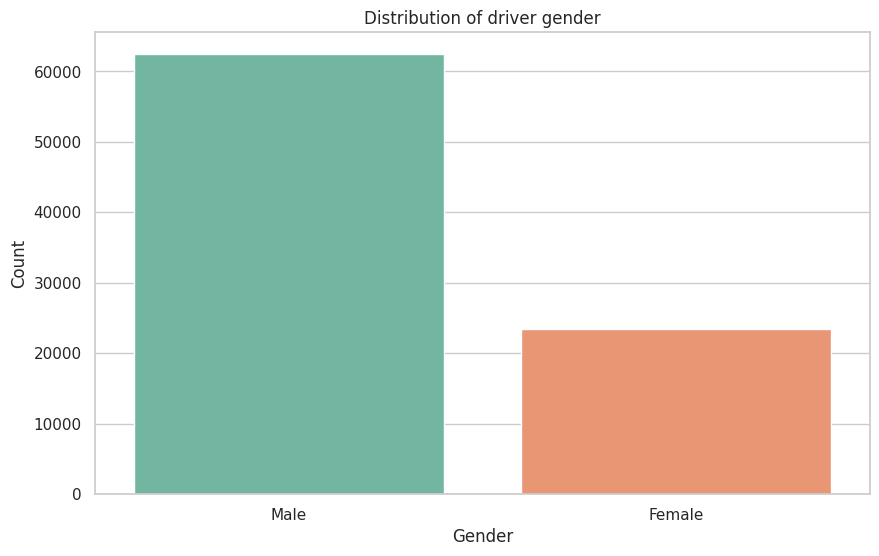

In [24]:
# Distribution of Driver Gender
sns.countplot(data=df, x='driver_gender', palette='Set2')
plt.title('Distribution of driver gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-22-1413139804.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='driver_age', palette='muted')


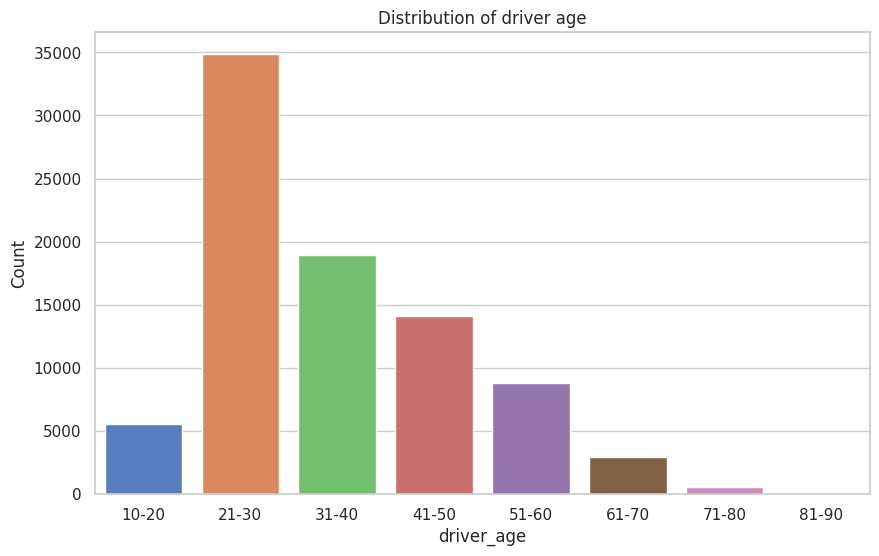

In [22]:
# Distribution of Driver Age
bins=[10,20,30,40,50,60,70,80,90]
labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90']
df['driver_age']=pd.cut(df['driver_age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='driver_age', palette='muted')
plt.title('Distribution of driver age')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-30-2729664662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='violation', palette='Set2')


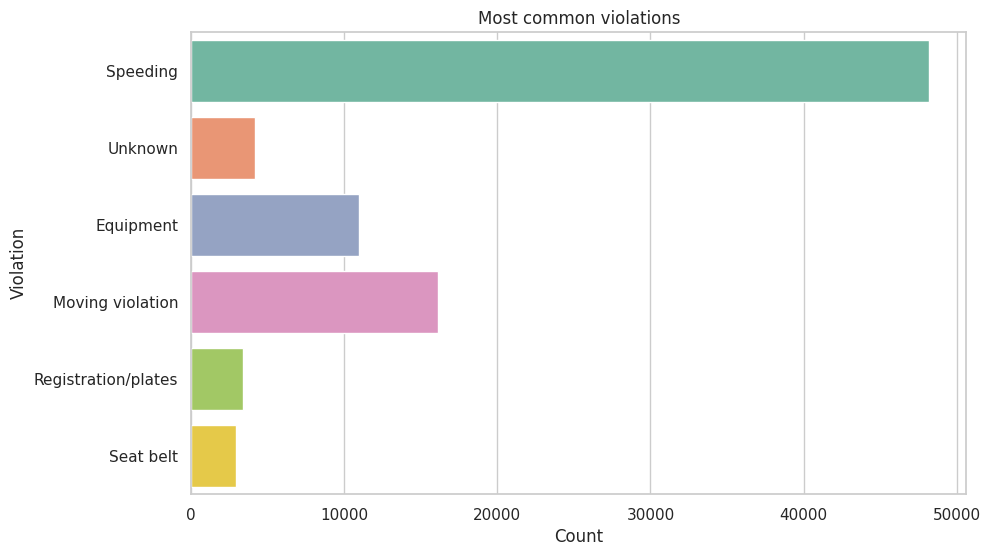

In [30]:
# Most Common Violations
sns.countplot(data=df, y='violation', palette='Set2')
plt.title('Most common violations')
plt.xlabel('Count')
plt.ylabel('Violation')
plt.show()